https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
https://www.kaggle.com/stephaniestallworth/housing-feature-engineering-regression
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

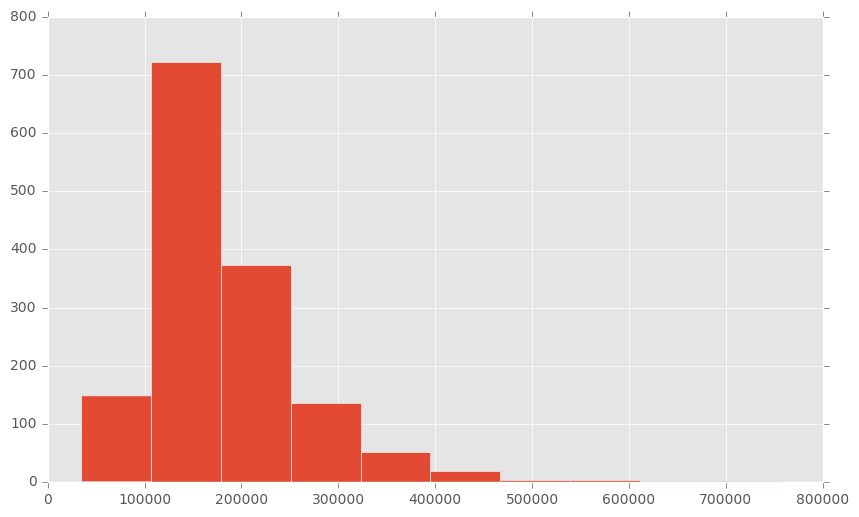

In [5]:
#Plotting the target variable
plt.hist(train.SalePrice)
plt.show()

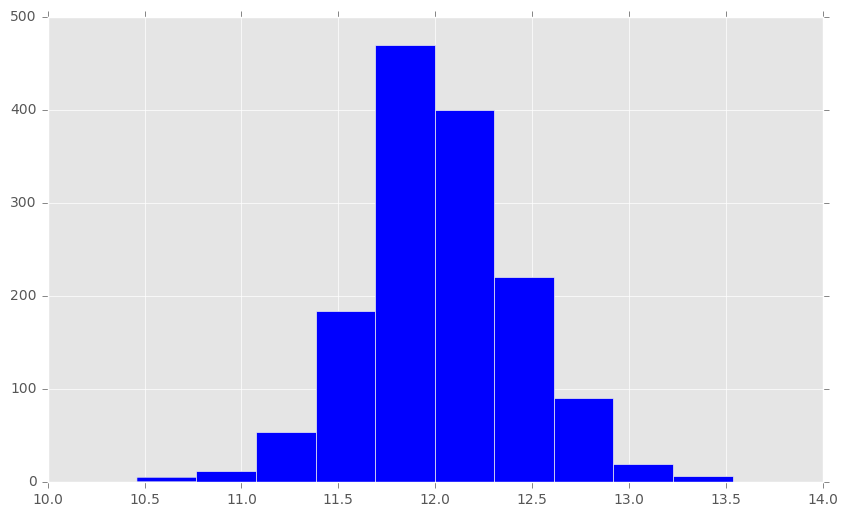

In [6]:
plt.hist(np.log(train.SalePrice), color = "blue")
plt.show()
#Looks a lot more normally distributed

## Feature Engineering

1. Outlier treatment: Based on top correlated variables, we'll plot scatterplots and try to eliminate those observations which are at extreme ends. For example, GrLivArea and SalePrice plot reveals that some observations are at the extreme ends of x axis(generally called leverage points), these values will be removed from the training data. Also regression is vulnerable to ouliers, and hence we will be removing them but we have to keep in mind that removing ouliers is not always the best possible option

2. Missing value treament: There are a lot of columns which have a very high proportion of 'NAs'. However, not all NAs are null values and that will be treated accordingly. If there are any actual nulls present, those will be treated with median for numerical features and mode for categorical variables

3. Numeric to categorical variables: Some discrete numerical variables will be converted to categorical 

4. Label encoding: Categorical variables that have some sort of ordering in them i.e. ordianl variables will be encoded 

5. Log transformation of skewed variables: We'll set a threshold of 0.75 for skewness and variables having skewness higher than the threshold will be log transformed. When variables are log transformed we tend to make distribution normal by pulling extreme values towards the median 

6. One hot encoding: All the categorical variables will be converted into dummy variables in this final step of feature engineering
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [7]:
(train[[0]].dtypes == 'int64') | (train[[0]].dtypes == 'float64')
#print(train.iloc[:, 0].dtypes)
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [8]:
#finding out top 5 variables having positive and negative correlation
corr = numeric_features.corr()["SalePrice"]
print(corr.sort_values(ascending=False)[:5])
print(corr.sort_values(ascending=True)[:5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64


In [9]:
quality_pivot = train.pivot_table(index="OverallQual", values = "SalePrice", aggfunc= np.median)
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

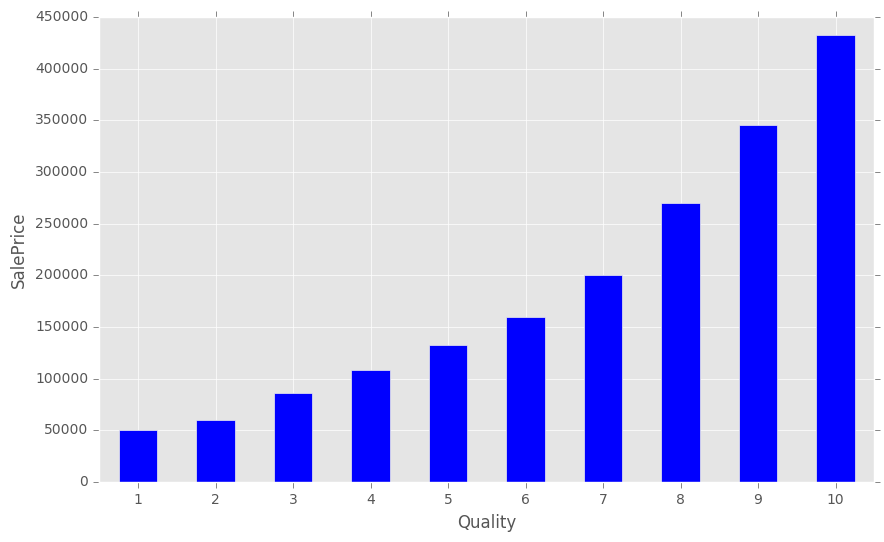

In [10]:
#As the quality of the house improves, so should it's price. It's being proved with bar graph
quality_pivot.plot(kind = "bar")
plt.xlabel('Quality')
plt.ylabel('SalePrice')
plt.xticks(rotation = 0)
plt.show()

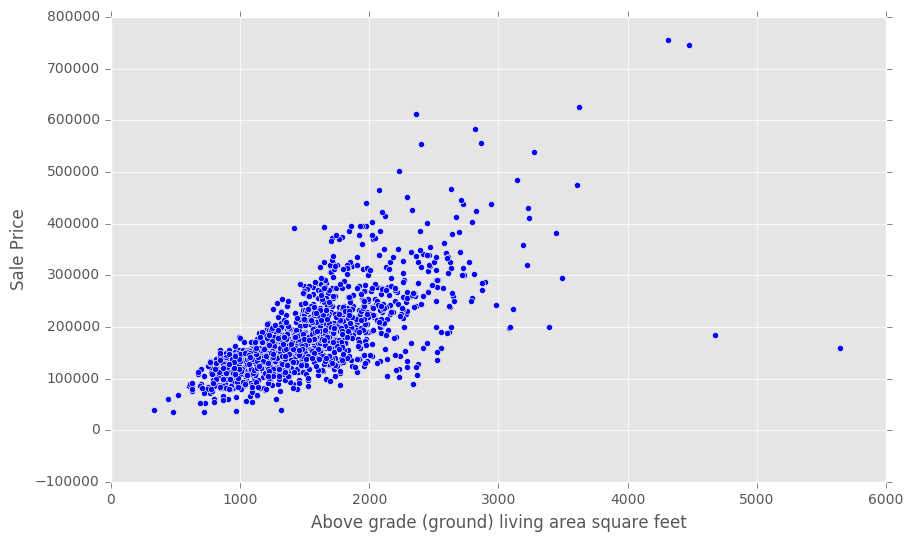

In [11]:
#We find 2 outliers in this graph 
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

### Outlier treatment

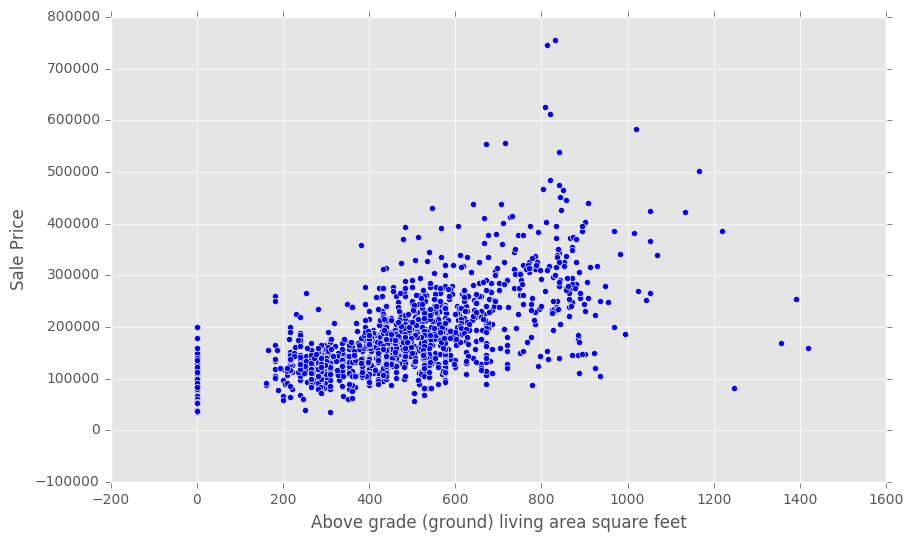

In [12]:
plt.scatter(x=train['GarageArea'], y=train['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We'll try to remove some outliers based on the graphs that we plotted. We'll set the condition as mentioned below

In [13]:
train[(train['GrLivArea'] > 4500) | (train['GarageArea'] > 1200)][["GrLivArea", "SalePrice", "GarageArea"]]

,GrLivArea,SalePrice,GarageArea
523,4676,184750,884
581,2042,253293,1390
825,2084,385000,1220
1061,894,81000,1248
1190,1622,168000,1356
1298,5642,160000,1418


In [14]:
train_copy = train
#train = train[(train_copy['GrLivArea'] > 4500) | (train['GarageArea'] > 1200)]
train = train[~(train['GrLivArea'] > 4500) & ~(train['GarageArea'] > 1200)]

In [15]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Concatenating train and test data to form a new dataframe

In [16]:
y = np.log1p(train.SalePrice)
saleprice = train.SalePrice
test_id = test.Id
train_rows = train.shape[0]
test_rows = test.shape[0]
train.drop(['SalePrice', 'Id'], axis = 1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
print(train_rows)
print(test_rows)


1454
1459


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
all_data = pd.concat([train, test], ignore_index=True )
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
all_data.shape

(2913, 79)

### Missing values treatment

In [19]:
#Print missing values present in each column 
missing = all_data.columns[all_data.isnull().any()].tolist()
print("Number of columns with missing values: ", len(missing))
#print(train.isnull().sum().sort_values(ascending = False))
#print(train.isnull().any())
#print(train[missing].isnull().sum().sort_values(ascending = False))

Number of columns with missing values:  34


In [20]:
#Handling missing values where NA's have some meaning
all_data.loc[:, "PoolQC"] = all_data.loc[:, "PoolQC"].fillna("No")
all_data.loc[:, "MiscFeature"] = all_data.loc[:, "MiscFeature"].fillna("No")
all_data.loc[:, "Alley"] = all_data.loc[:, "Alley"].fillna("No")
all_data.loc[:, "Fence"] = all_data.loc[:, "Fence"].fillna("No")
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("No")
all_data.loc[:, "LotFrontage"] = all_data.loc[:, "LotFrontage"].fillna(0)
#Houses having no garage = 81 records 
all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("No")
all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("No")
all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("No")
all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("No")
all_data.loc[:, "GarageYrBlt"] = all_data.loc[:, "GarageYrBlt"].fillna(0)
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("No")
all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("No")
all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("No")
all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("No")
all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("No")
all_data.loc[:, "BsmtFullBath"] = all_data.loc[:, "BsmtFullBath"].fillna(0)
all_data.loc[:, "BsmtHalfBath"] = all_data.loc[:, "BsmtHalfBath"].fillna(0)
all_data.loc[:, "BsmtUnfSF"] = all_data.loc[:, "BsmtUnfSF"].fillna(0)
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("None")
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)


missing = all_data.columns[all_data.isnull().any()].tolist()
print(all_data[missing].isnull().sum().sort_values(ascending = False))

MSZoning       4
Functional     2
Utilities      2
SaleType       1
GarageArea     1
GarageCars     1
KitchenQual    1
Electrical     1
TotalBsmtSF    1
BsmtFinSF2     1
BsmtFinSF1     1
Exterior2nd    1
Exterior1st    1
dtype: int64


In [21]:
missing = all_data.columns[all_data.isnull().any()].tolist()

#Finding the numeric and categorical variables having missing data
missing_numeric = all_data[missing].select_dtypes(include = [np.number]).columns
missing_cat = all_data[missing].select_dtypes(exclude = [np.number]).columns
print(missing_numeric)
print(missing_cat)


Index(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'GarageCars', 'GarageArea'], dtype='object')
Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical',
       'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')


In [22]:
for cols in missing_cat:
    all_data[cols] = all_data[cols].fillna(all_data[cols].mode()[0])

for cols in missing_numeric:
    all_data[cols] = all_data[cols].fillna(all_data[cols].median())

In [23]:
missing = all_data.columns[all_data.isnull().any()].tolist()
print("Number of columns with missing values: ", len(missing))

Number of columns with missing values:  0


### Converting numerical variables that are actually categorical

In [24]:
#Note that having lower unique values in an attribute doesn't qualify it as categorical 
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [25]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,65,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,No,No,No,0,Feb,2008,WD,Normal
1,SC20,RL,80,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,0,No,No,No,0,May,2007,WD,Normal
2,SC60,RL,68,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,0,No,No,No,0,Sep,2008,WD,Normal
3,SC70,RL,60,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,0,No,No,No,0,Feb,2006,WD,Abnorml
4,SC60,RL,84,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,0,No,No,No,0,Dec,2008,WD,Normal


### Label encoding
Converting variables which are most likely ordinal i.e. having some ranking or order

In [26]:
from sklearn.preprocessing import LabelEncoder
'''lbl = LabelEncoder()
lbl.fit(list(train['PoolQC'].values))
trnsfmd = lbl.transform(list(train['PoolQC'].values))
'''

cols_to_be_trnsfmd = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'GarageFinish', 'LotShape','CentralAir', 'MSSubClass', 'PavedDrive', 
        'Street', 'Alley', 'CentralAir',
        'OverallCond',  'YrSold', 'MoSold')

#Training data
for col in cols_to_be_trnsfmd:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))   
    
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65,8450,1,1,3,Lvl,AllPub,Inside,...,0,0,3,No,No,0,3,2,WD,Normal
1,5,RL,80,9600,1,1,3,Lvl,AllPub,FR2,...,0,0,3,No,No,0,8,1,WD,Normal
2,10,RL,68,11250,1,1,0,Lvl,AllPub,Inside,...,0,0,3,No,No,0,11,2,WD,Normal
3,11,RL,60,9550,1,1,0,Lvl,AllPub,Corner,...,0,0,3,No,No,0,3,0,WD,Abnorml
4,10,RL,84,14260,1,1,0,Lvl,AllPub,FR2,...,0,0,3,No,No,0,2,2,WD,Normal


### Transforming skewed variables 
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:
<li>If skewness is less than -1 or greater than 1, the distribution is highly skewed</li>
<li>If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed</li>
<li>If skewness is between -0.5 and 0.5, the distribution is approximately symmetric</li>
https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

In [27]:
from scipy.stats import skew
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numeric_features = all_data.select_dtypes(exclude = ["object"]).columns
#Excluding id and target variable
numeric_features = numeric_features[(numeric_features!= 'SalePrice') & (numeric_features!= 'Id')]
skewness = all_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending = False)

#Printing top 10 skewed features
skewness[:10]

MiscVal          21.934376
PoolArea         17.676417
LotArea          13.162340
LowQualFinSF     12.076090
3SsnPorch        11.364106
KitchenAbvGr      4.297140
BsmtFinSF2        4.141222
EnclosedPorch     3.999248
ScreenPorch       3.941914
BsmtHalfBath      3.926798
dtype: float64

In [28]:
#Log transforming skewed variables
skewed_features = skewness[abs(skewness) > 0.75].index 
for col in skewed_features:
    all_data[col] = np.log1p(all_data[col])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65,9.042040,0.693147,1,3,Lvl,AllPub,Inside,...,0,0,1.386294,No,No,0,3,2,WD,Normal
1,5,RL,80,9.169623,0.693147,1,3,Lvl,AllPub,FR2,...,0,0,1.386294,No,No,0,8,1,WD,Normal
2,10,RL,68,9.328212,0.693147,1,0,Lvl,AllPub,Inside,...,0,0,1.386294,No,No,0,11,2,WD,Normal
3,11,RL,60,9.164401,0.693147,1,0,Lvl,AllPub,Corner,...,0,0,1.386294,No,No,0,3,0,WD,Abnorml
4,10,RL,84,9.565284,0.693147,1,0,Lvl,AllPub,FR2,...,0,0,1.386294,No,No,0,2,2,WD,Normal


### One hot encoding for categorical variables

In [29]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65,9.042040,0.693147,1,3,7,4,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80,9.169623,0.693147,1,3,6,7,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68,9.328212,0.693147,1,0,7,4,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,11,60,9.164401,0.693147,1,0,7,4,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,10,84,9.565284,0.693147,1,0,8,4,2000,2000,...,0,0,0,1,0,0,0,0,1,0


We're done with feature engineering and we'll now move on to the next big step which is 'Modelling'.

## Modelling 
We'll start with Linear Regression and then move on to Regularized methods. The variables will be standardized before using them in regularized methods. We'll select the model with lowest cross validated error. 

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict 

Let's start by defining the rmse and prediction functions built on k-fold cross validation

In [31]:
folds = 10
seed = 25
train_data = all_data.iloc[:train_rows, :]
test_data = all_data.iloc[train_rows:, ]
kf = KFold(n_splits=folds, shuffle=True, random_state=seed).get_n_splits(train_data.values)
print(train_data.shape)
print(test_data.shape)

def rmse_score(model):
    error = np.sqrt(-cross_val_score(model, train_data.values, y, cv = kf, scoring = "neg_mean_squared_error"))
    return(error)   

def cv_predictions(model):
    pred = cross_val_predict(model, train_data, y, cv = kf) 
    return pred

(1454, 236)
(1459, 236)


### Linear Regression 

In [32]:
#1. Fit the model
#2. Get the cross validated error
#3. Obtain cross-validated predictions
#4. Plot residuals vs predicted graph
#5. Plot predicted vs actual values graph 


regr = linear_model.LinearRegression()
regr.fit(train_data, y)

print("Cross-validated RMSE: ", rmse_score(regr).mean())
print("Predicted values: ", np.expm1(cv_predictions(regr)))


# # The coefficients
# print('Coefficients: \n', regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f"
#       % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Cross-validated RMSE:  0.116213698168
Predicted values:  [ 207603.77347599  196452.57923545  219078.66850069 ...,  282204.95820407
  141131.76169338  140998.18214818]


In [41]:
#Lets make predictions on the test data using linear regression
pred_regr = np.expm1(regr.predict(X=test_data))
pred_regr = pd.Series(pred_regr)
df_test = pd.DataFrame({'Id':test_id, 'SalePrice': pred_regr})
df_test.head()

,Id,SalePrice
0,1461,123956.804202
1,1462,166274.981371
2,1463,185002.084836
3,1464,193491.444732
4,1465,202632.169205


In [42]:
df_test.to_csv('regr_op.csv', index=False)